<a href="https://colab.research.google.com/github/erinp0/Coding-Assignments/blob/main/Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EMAT31530 Worksheet 4 Unsupervised Learning

In this worksheet we will explore the use of different clustering algorithms on data, and how we can utilize dimensionality reduction techinqiues to visualise data and the resulting clusters.

Let's start by generating some data. The code in the cell below will generate 5 different 'blobs' of data points, and then visualise them.

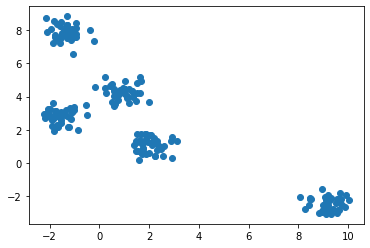

In [43]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

#makes random 5 clusters
X, y_true = make_blobs(n_samples=200, centers=5,
                       cluster_std=0.45, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

Looking at this, it is quite easy to see 5 different clusters. However, we would like an algorithm to automatically detect these clusters. 

By now you should be familar with scikit-learn, so have a look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and apply k-means to this dataset we just created.

## Task 1
**Task: Specifically you should**
1.   Apply k-means to the data
2.   Extract the cluster assignments (the labels) for each data point (consult the documentation on how to do this).
3.   Visualise these datapoints in a scatterplot. You can use the 'c' argument to the matplotlib scatter function to set the colours of data points based on their cluster assignments.



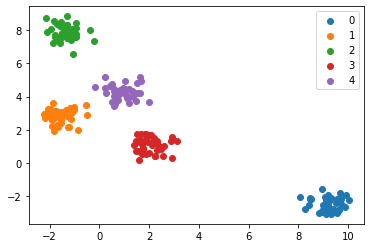

In [44]:
# your code here
# init is initial choice of clusters, k-means++ is a smart first choice, can also have random
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5,init='k-means++',n_init = 10, max_iter = 300)
kmeans.fit(X)
#extracts the cluster labels for each point
label = kmeans.labels_
import numpy as np
u_labels = np.unique(label)
 
#plotting the results, finds unique labels (5) and assigns a colour
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

You should see something similar to this once you have completed the task.

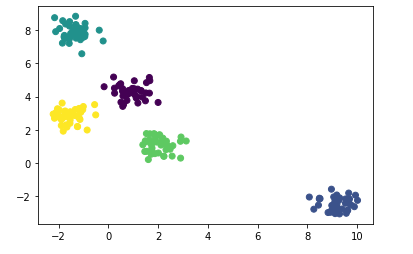



This is great, we can see that k-means has found the same clusters we  would! Note that you had to use the 'fit' function in k-means but this time, because it is unsupervised, you dont supply the labels when 'training'/'fitting' the model.

However, how well would k-means work on a more complex dataset?

In the cell below we import a dataset known as the 'digits' dataset. This dataset consists of images of 10 handwritten digits (0 to 9). One task could be to train a model to predict the digit based on the image, but since we are interested in unsupervised learning, we will instead assume we have no access to the labels during the algorithms 'learning' process and try to detect '10' clusters, where each cluster contains only one 'class' of digit.

In [45]:
from sklearn import datasets
digits = datasets.load_digits()

In [46]:
X = digits.data
y = digits.target

Each digit is a vector of length 64
However, we can reshape it such that it is a 8 x 8 image, which we can view


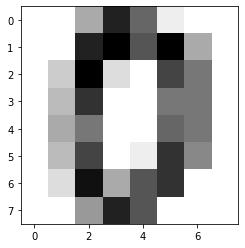

In [47]:
# this will visualise the image. note here that we 'reshape' the vector before displaying it. 
# this is because the image, which was originally 8x8 pixels, has been 'flattened' to a 64 dimensional vector.
print("Each digit is a vector of length %i" % len(X[0]))
reshaped_x0 = X[0].reshape(8, 8)
print("However, we can reshape it such that it is a %i x %i image, which we can view" % (reshaped_x0.shape[0], reshaped_x0.shape[1]))
plt.imshow(reshaped_x0, cmap=plt.cm.binary)

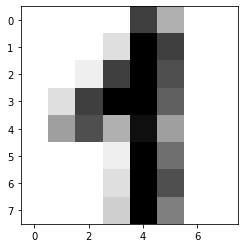

In [48]:
plt.imshow(X[42].reshape(8, 8), cmap=plt.cm.binary)

## Task 2
**Task: apply k-means to the digit dataset, and extract the cluster assignments (and call the variable cluster_assignments) for each digit. Set the random_state to be 0.**

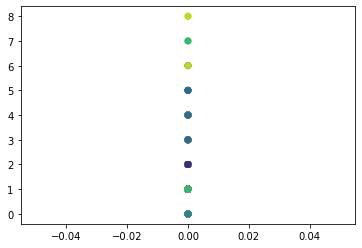

In [49]:
# your code here.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10,init='k-means++',random_state=0)
kmeans.fit(X)
#extracts the cluster labels

cluster_assignments = kmeans.labels_
plt.scatter(X[:,0],X[:,1],c=cluster_assignments)

Can we visualise our data? This isn't so straightforward, as our data is 64-dimensional. Rarely will you be working with data in 2 dimensions (or 3) and thus can be directly visualised. There is, however, something we can do to work around that, which we will get to soon. However, ultimatately, while visualisation is useful, we often want to know how good our clusters are quantitatively. 

There are a number of different metrics for assessing the performance of a cluster. One that is often used is known as the 'normalised mutual information' (NMI) score.

The Normalized Mutual Information (NMI) can be viewed as a normalization of the mutual information to scale the results between 0 and 1, where 0 has no mutual information and 1 is perfect correlation. More concretely, NMI is defined as:
\begin{equation}
NMI = \frac{
2I(y, c)}{[H(y)+ H(c)]}
\end{equation}
where $y$ are the ground truth labels, $c$ are the cluster labels (cluster assignments for each point), $H$ measures the entropy, and $I$ is the mutual information between the ground truth labels and the cluster labels.

Larger values indicate a better clustering. If every datapoint was assigned to the correct cluster, then the NMI would be 1.

In [50]:
from sklearn.metrics.cluster import normalized_mutual_info_score
nmi = normalized_mutual_info_score(y, cluster_assignments)
print("The NMI score of this clustering is %f" % nmi)

The NMI score of this clustering is 0.744341


OK, great, we have some sort of number (0.74) that tells us how good the clusters we found are. Let's try and visualise our clusters now too. 

The first aspect that can be visualised with centroid-based algorithms such as k-means is the centroids (cluster centers). Let's visualise each of the 10 centroids, hopefully each of them will look like a distinct digit.

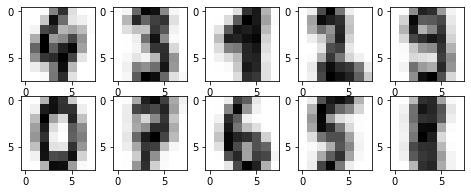

In [51]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8) #10 CENTRES, 64 DIMENSIONAL SO 8X8
for axi, center in zip(ax.flat, centers):
    axi.imshow(center, cmap=plt.cm.binary)

This looks pretty good, each of the centroids represent the 'center' of a cluster, and we can see 10 different digits, indicating that at least the centroids represent the different digits. However, in order to better understand the cluster quality, we want to look at the other data points in the cluster too.

A common approach to visualising data, including after you have clustered it, is to use a dimensionality reduction method (such as PCA or tSNE) to reduce the higher dimensional data down to 2 dimensions and plot it.

You can find the documentation for PCA here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

## Task 3
**Task: apply PCA to the digits dataset, reducing the data to two dimensions. Create a scatter plot of these two dimensions, and use the cluster assignments to colour each datapoint.**

<function matplotlib.pyplot.colorbar>

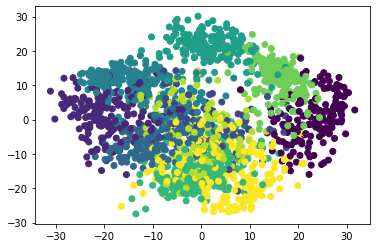

In [52]:
# your code here
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2) #however many dimensions you want it fit it to
pca.fit(X) #2 eigenvectors which correspond to 2 largest eigenvalues
pca_X = pca.transform(X) #reduces to 2 dimensions using the eigenvectors

plt.scatter(pca_X[:,0],pca_X[:,1],c=cluster_assignments)
plt.colorbar

If it worked, you should see something similar to below:
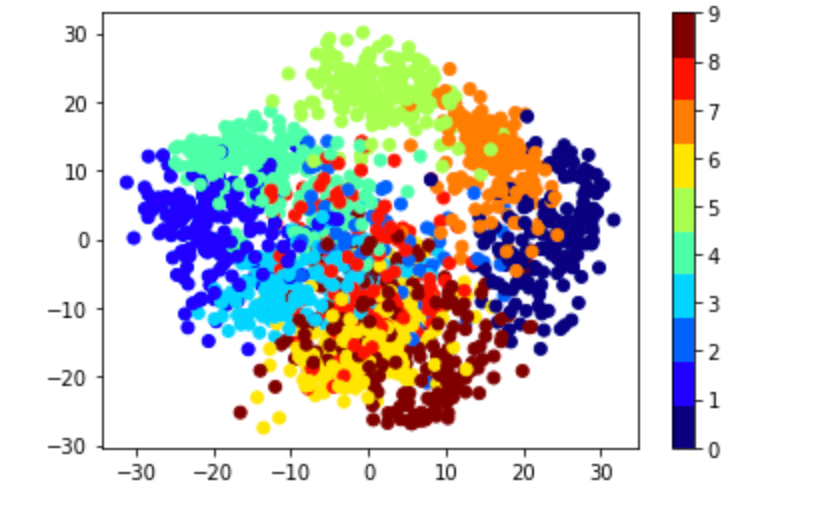

**Task: apply TSNE to the digits dataset, reducing the data to two dimensions. Create a scatter plot of these two dimensions, and use the cluster assignments to colour each datapoint.**

You can find the documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

<function matplotlib.pyplot.colorbar>

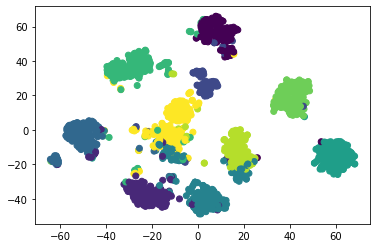

In [53]:
# your code here
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2) #however many dimensions you want it fit it to
#2 eigenvectors which correspond to 2 largest eigenvalues
tsne_X = tsne.fit_transform(X) #reduces to 2 dimensions using the eigenvectors

plt.scatter(tsne_X[:,0],tsne_X[:,1],c=cluster_assignments)
plt.colorbar

You should see something similar to this:



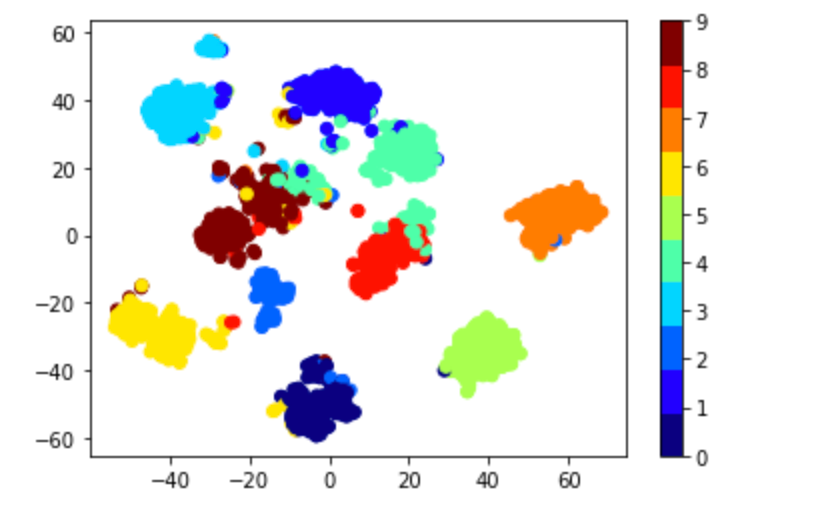


As we know, PCA is linear, while TSNE is non-linear, which may be the reason why TNSE is finding much more interesting structure.

Let's try a new dataset, specifically one that may be more challenging for the k-means algorithm to perform well on.

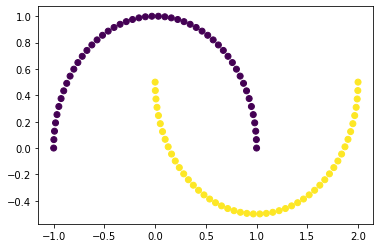

In [61]:
from sklearn.datasets import make_moons
X, y = make_moons()
plt.scatter(X[:,0], X[:,1], c=y)

## Task 4

**Task: apply k-means to this dataset, and visualise the cluster assignments.**

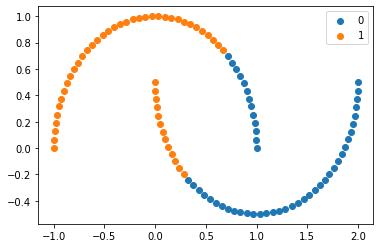

In [62]:
# your code here
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2,init='k-means++',n_init = 10, max_iter = 300)
kmeans.fit(X)
#extracts the cluster labels for each point
label = kmeans.labels_
import numpy as np
u_labels = np.unique(label)
 
#plotting the results, finds unique labels (5) and assigns a colour
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

The result should be a plot that demonstrates k-means does not find the clusters that we would expect. Think about to how in the lectures we discussed how k-means works. Why does k-means struggle here? Let's try another algorithm that may be better suited. Scikit-learn  has several other clustering algorithms. Have a look at them here: https://scikit-learn.org/stable/modules/clustering.html

## Task 5
**Task: apply DBSCAN (without tweaking any hyperparameters) to the dataset and visualise the resulting clusters in a scatterplot.**


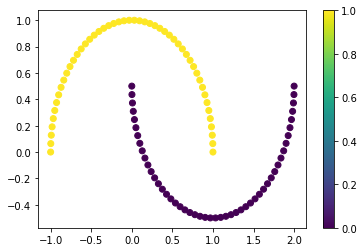

In [64]:
# your code here
# density based clustering algorithm, looks for dense areas
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(X)
cluster_assignments = dbscan.labels_
plt.scatter(X[:,0],X[:,1],c=cluster_assignments)
plt.colorbar()

Your plot should look similar to this:
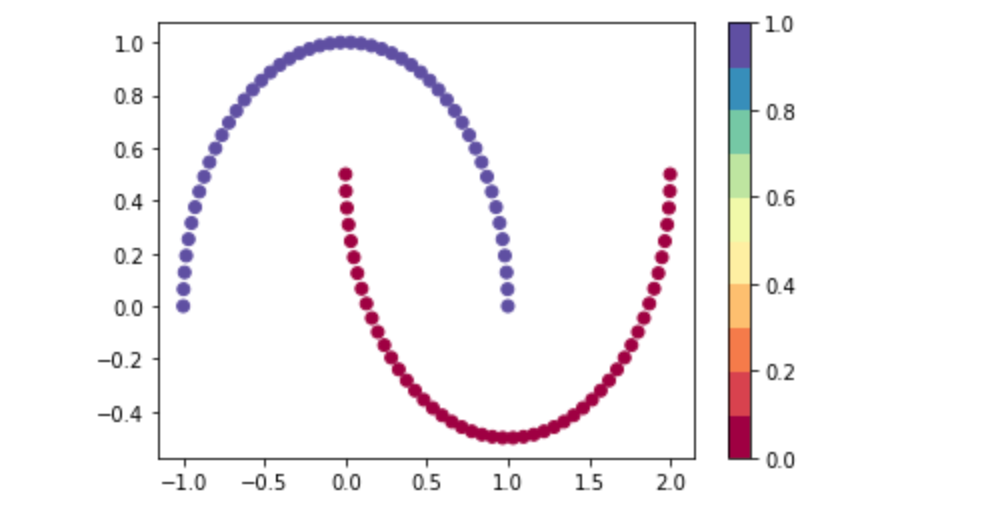



This is great, DBSCAN has correctly identified the two natural clusters in the data.

Note that we also didn't tell it how many clusters to find, DBSCAN automatically detects the number of clusters. This is controlled by some hyperparameters, specifically, eps (the neighbourhood size) and min_samplesint (the minimum number of samples required within a neighbourhood for a point to be a 'core point').

Let's see how these hyperparameters can alter the performance of DBSCAN on another dataset.

We will regenerate the same dataset as we used at the start of this worksheet.

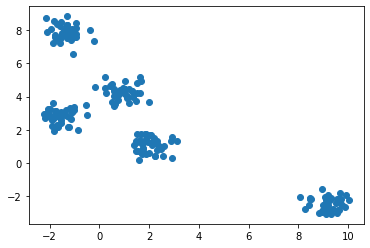

In [66]:
X, y_true = make_blobs(n_samples=200, centers=5,
                       cluster_std=0.45, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

## Task 6

**Task: apply DBSCAN, without changing any hyperparameters, to the dataset**

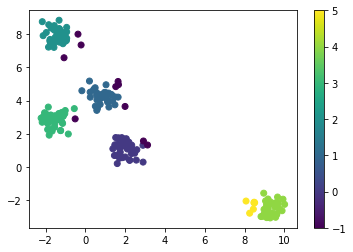

In [67]:
# your code here
dbscan = DBSCAN()
dbscan.fit(X)
cluster_assignments = dbscan.labels_
plt.scatter(X[:,0],X[:,1],c=cluster_assignments)
plt.colorbar()

If it worked, you should see that DBSCAN has correctly identified a number of clusters, however, more than the 5 we expected due to the generation process.

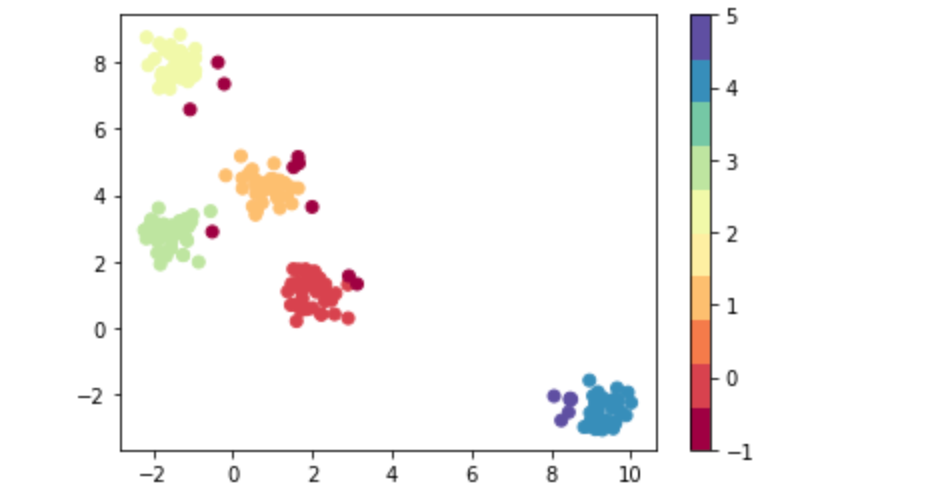


Instead, we can see 7 different colours, 6 of them are clusters (there is an additional cluster in the bottom right), and the 7th represents 'noise points', these are the outliers that wuth the default hyperparameters, DBSCAN has deemed do not belong to any cluster.

## Task 7
**Task: investigate the eps and min_samples hyperparameters in order to achieve the desired 5 clusters, without any noise points.**

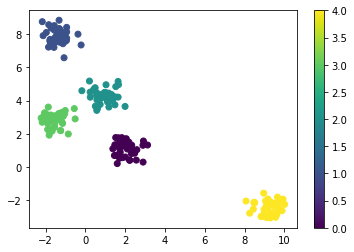

In [68]:
# your code here.
dbscan = DBSCAN(eps=1)
dbscan.fit(X)
cluster_assignments = dbscan.labels_
plt.scatter(X[:,0],X[:,1],c=cluster_assignments)
plt.colorbar()

Hopefully in your exploration of these two parameters you have realised how sensitive DBSCAN is two these parameters, specifically eps. This shows that there is no 'magic bullet' in unsupervised learning. While DBSCAN doesn't require the number of clusters in order to function (most popular clustering methods do, e.g., k-means), it does require some apriori knowledge of the data structure.